In [4]:
import numpy as np
import pandas as pd
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/shreya-maher/DSEM_Datasets/main/TMNIST_Data.csv')
data


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(data['names'].unique())
print(data['names'].nunique())


['GrandHotel-Regular' 'EncodeSansCondensed-Medium' 'Varela-Regular' ...
 'CourierPrime-Italic' 'Bentham-Regular' 'AveriaSerifLibre-Ligh']
2990


In [7]:
data['names'].value_counts()


names
GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: count, Length: 2990, dtype: int64

In [8]:
N=list(range(len(data)))
n=len(data)
print(n)
random.seed(2021)
random.shuffle(N)


29900


In [9]:
trainY=data.loc[N[0:(n//4)*3],'labels']
testY=data.loc[N[(n//4)*3:],'labels']
data1=data.drop(['names','labels'],axis=1)
trainX=data1.loc[N[0:(n//4)*3]]
testX=data1.loc[N[(n//4)*3:]]


In [10]:
binencoder = LabelBinarizer()
y0 = trainY
y = binencoder.fit_transform(y0)
y


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
X_images = trainX.values.reshape(-1,28,28)
test_images = testX.values.reshape(-1,28,28)

print(X_images.shape)
print(test_images.shape)


(22425, 28, 28)
(7475, 28, 28)


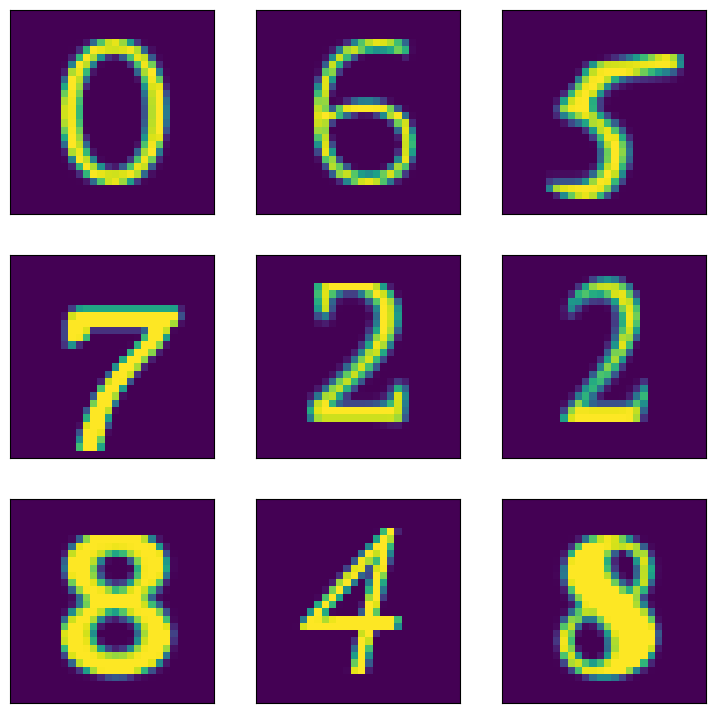

In [12]:
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size = 0.2, random_state=90)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17940, 28, 28)
(4485, 28, 28)
(17940, 10)
(4485, 10)


In [15]:
X_train = (X_train/255).reshape(-1,28,28,1).astype('float32')
X_test = (X_test/255).reshape(-1,28,28,1).astype('float32')


In [16]:
test_images = (test_images/255).reshape(-1,28,28,1).astype('float32')


In [17]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [19]:
result = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=92, verbose=2)
result


Epoch 1/30


156/156 - 2s - loss: 0.4020 - accuracy: 0.8887 - val_loss: 0.1279 - val_accuracy: 0.9657 - 2s/epoch - 12ms/step
Epoch 2/30
156/156 - 1s - loss: 0.0861 - accuracy: 0.9769 - val_loss: 0.0910 - val_accuracy: 0.9785 - 1s/epoch - 7ms/step
Epoch 3/30
156/156 - 1s - loss: 0.0602 - accuracy: 0.9831 - val_loss: 0.0610 - val_accuracy: 0.9822 - 1s/epoch - 7ms/step
Epoch 4/30
156/156 - 1s - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0574 - val_accuracy: 0.9844 - 996ms/epoch - 6ms/step
Epoch 5/30
156/156 - 1s - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0514 - val_accuracy: 0.9858 - 1s/epoch - 7ms/step
Epoch 6/30
156/156 - 1s - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.0571 - val_accuracy: 0.9852 - 1s/epoch - 7ms/step
Epoch 7/30
156/156 - 1s - loss: 0.0261 - accuracy: 0.9925 - val_loss: 0.0449 - val_accuracy: 0.9877 - 1s/epoch - 6ms/step
Epoch 8/30
156/156 - 1s - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0510 - val_accuracy: 0.9872 - 1s/epoch - 7ms/step
Epoch 9/30
156/156

<Axes: >

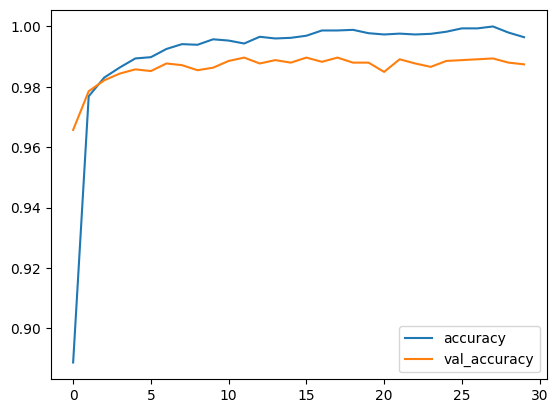

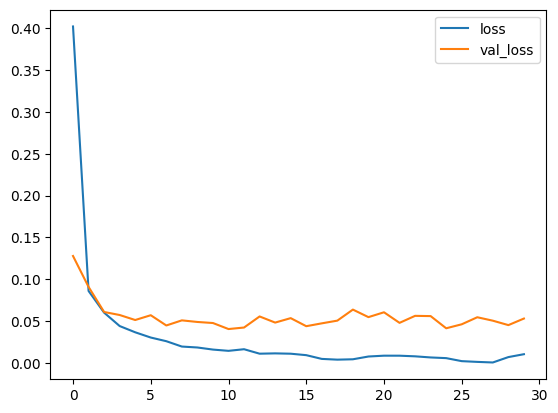

In [20]:
his = pd.DataFrame(result.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()


In [21]:
y_pred = model.predict(test_images)
print(y_pred[0])


234/234 [==============================] - 0s 1ms/step
[4.5583288e-09 2.4743221e-07 2.7961841e-08 9.7005111e-01 7.6110362e-10
 2.9904820e-02 7.4918702e-09 3.6211185e-07 1.3455206e-06 4.2057101e-05]


In [22]:
y_pred2=[]
for item in y_pred:
    y_pred2+=[np.argmax(item)   ]
PRED=np.array(y_pred2)
ANS=np.array(testY)
print(PRED[0:10])
print(ANS[0:10])


[3 3 1 2 0 2 9 2 8 6]
[3 3 1 2 0 2 9 2 8 6]


In [23]:
accuracy_score(ANS,PRED)


0.9905016722408027

In [26]:
import tensorflow as tf
print(model.summary())

# Create representative dataset
rep_data = X_train[:1000]
rep_labels = y_train[:1000]

# Convert the representative dataset to a tensor
rep_data = tf.cast(rep_data, tf.float32)

# Create the representative dataset function
def representative_dataset():
    for i in range(1000):
        yield [rep_data[i:i+1]]

# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()
# Save the model
with open('tmnist_model.tflite', 'wb') as f:
    f.write(tflite_model)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

INFO:tensorflow:Assets written to: C:\Users\josef\AppData\Local\Temp\tmpxhejqqy9\assets
c:\Users\josef\anaconda3\envs\imp\lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
